### TP01 : Recadrage de l'image

# TP01_sans_utiliser_OpenCV
nous avons effectue plusieurs transformations géométriques sur une image, comme la rotation et la translation, en utilisant des bibliothèques comme NumPy, Matplotlib et PIL. D'abord, on a chargé une image et l'affiche. Ensuite, on a appliqué une rotation manuelle de 45° autour du centre de l'image en calculant les nouvelles positions des pixels à l'aide de formules trigonométriques. Après la rotation, on effectue une translation de l'image en déplaçant les pixels de 50 pixels à droite et de 30 pixels vers le bas. Chaque transformation est réalisée manuellement sans utiliser de bibliothèques comme OpenCV, permettant ainsi de mieux comprendre les calculs sous-jacents aux manipulations d'images .

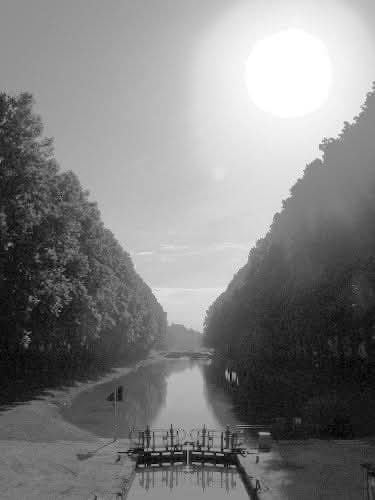

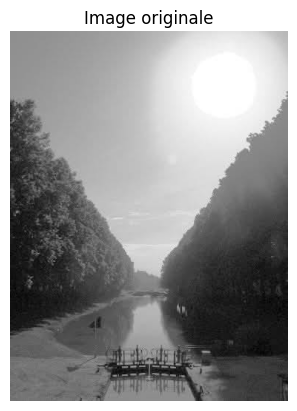

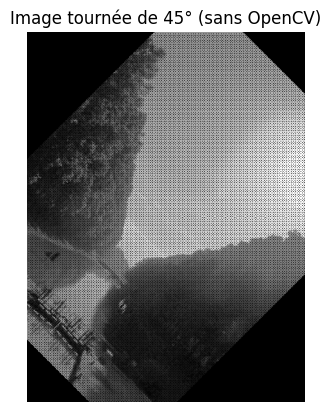

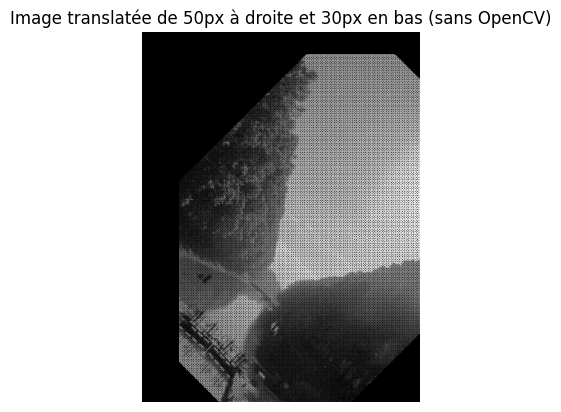

In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display

image = Image.open(r"C:\Users\DELL\Desktop\img1.jpg")
display(image)

image_array = np.array(image)
h, w = image_array.shape[:2]

plt.imshow(image_array)
plt.title("Image originale")
plt.axis("off")
plt.show()

angle_deg = 45
angle_rad = np.radians(angle_deg)


cx, cy = w // 2, h // 2


rotated_image = np.zeros_like(image_array)

for y in range(h):
    for x in range(w):
        
        x_shifted = x - cx
        y_shifted = y - cy
        
        x_rot = int(cx + x_shifted * np.cos(angle_rad) - y_shifted * np.sin(angle_rad))
        y_rot = int(cy + x_shifted * np.sin(angle_rad) + y_shifted * np.cos(angle_rad))
        
        if 0 <= x_rot < w and 0 <= y_rot < h:
            rotated_image[y_rot, x_rot] = image_array[y, x]

plt.imshow(rotated_image)
plt.title(f"Image tournée de {angle_deg}° (sans OpenCV)")
plt.axis("off")
plt.show()

dx, dy = 50, 30

translated_image = np.zeros_like(image_array)

for y in range(h):
    for x in range(w):
        x_new = x + dx
        y_new = y + dy
        
        if 0 <= x_new < w and 0 <= y_new < h:
            translated_image[y_new, x_new] = rotated_image[y, x]

plt.imshow(translated_image)
plt.title(f"Image translatée de {dx}px à droite et {dy}px en bas (sans OpenCV)")
plt.axis("off")
plt.show()


# TP01_avec_utilisation_OpenCV


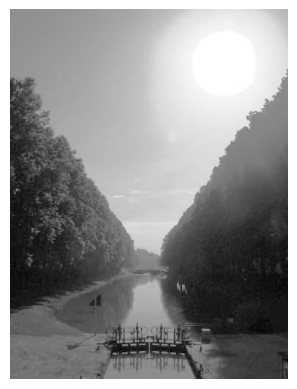

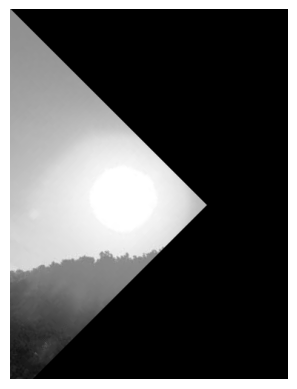

In [11]:
import cv2
img1 = cv2.imread(r"C:\Users\DELL\Desktop\img1.jpg")


img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

plt.axis('off')

plt.imshow(img1)
plt.show()

rows, cols, dim = img1.shape

rt = np.radians(45)
Mrt = np.float32([[np.cos(rt), -np.sin(rt), 0],
                [np.sin(rt), np.cos(rt), 0],
                [0, 0, 1]])


rotated_img = cv2.warpPerspective(img1, Mrt, (cols, rows))

plt.axis('off')
plt.imshow(rotated_img)
plt.show()

### TP02 : Égalisation de l'histogramme
On a effectué une égalisation d'histogramme sur une image en niveaux de gris. On a chargé l'image, la convertit en tableau NumPy et calcule les occurrences de chaque niveau de gris, puis crée un histogramme de l'image originale. Ensuite, On a calculé la distribution cumulée des niveaux de gris et la normalise pour redistribuer les niveaux de gris de manière uniforme. L'image égalisée est ensuite reconstruite et affichée côte à côte avec l'image originale, permettant de visualiser l'amélioration du contraste. Enfin, un histogramme de l'image égalisée est généré pour montrer la distribution des niveaux de gris après l'égalisation. Ce processus améliore le contraste de l'image en réajustant la répartition des niveaux de gris.

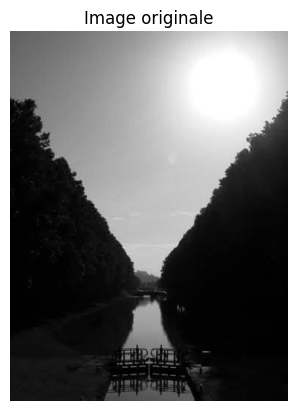

matrice de Img :
[[[ 95  95  95]
  [ 95  95  95]
  [ 95  95  95]
  ...
  [170 170 170]
  [169 169 169]
  [168 168 168]]

 [[ 96  96  96]
  [ 96  96  96]
  [ 96  96  96]
  ...
  [170 170 170]
  [169 169 169]
  [168 168 168]]

 [[ 96  96  96]
  [ 96  96  96]
  [ 96  96  96]
  ...
  [171 171 171]
  [170 170 170]
  [169 169 169]]

 ...

 [[ 20  20  20]
  [ 20  20  20]
  [ 20  20  20]
  ...
  [  4   4   4]
  [  4   4   4]
  [  4   4   4]]

 [[ 20  20  20]
  [ 20  20  20]
  [ 20  20  20]
  ...
  [  4   4   4]
  [  4   4   4]
  [  4   4   4]]

 [[ 20  20  20]
  [ 20  20  20]
  [ 20  20  20]
  ...
  [  4   4   4]
  [  4   4   4]
  [  4   4   4]]]
1D image table :
[95 95 95 ...  4  4  4]
Occurrences de chaque niveau de gris :
[ 2271 26490 49179 16017 18123 17625  9585 15723 10413  9474  7971  8943
  8322  8814  9111  5880  6165  5928  6048  7896  8037  5583  4884  3672
  2556  2178  2301  1716  1656  1398  1314  1254  1218   966   921  1035
   897   753   660   618   651   603   564   615   558

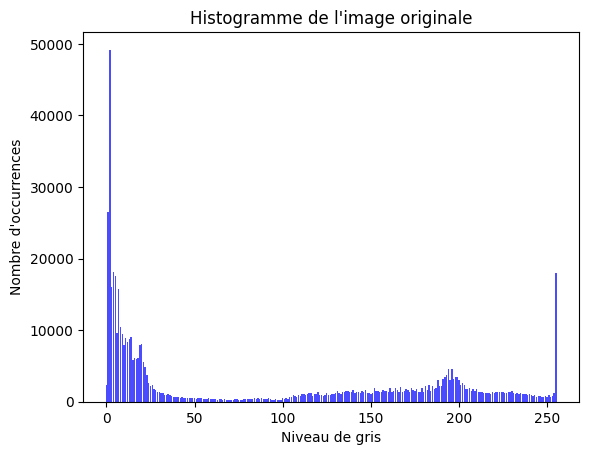

Distribution cumulée des niveaux de gris :
[  2271  28761  77940  93957 112080 129705 139290 155013 165426 174900
 182871 191814 200136 208950 218061 223941 230106 236034 242082 249978
 258015 263598 268482 272154 274710 276888 279189 280905 282561 283959
 285273 286527 287745 288711 289632 290667 291564 292317 292977 293595
 294246 294849 295413 296028 296586 297081 297543 298008 298491 298959
 299412 299814 300270 300744 301224 301641 302049 302433 302895 303318
 303711 304044 304413 304716 305070 305412 305682 306039 306327 306603
 306834 307080 307386 307737 308133 308406 308691 308940 309255 309588
 310020 310404 310797 311244 311754 312159 312612 313032 313491 313890
 314262 314703 315237 315615 315882 316134 316455 316722 317016 317319
 317814 318219 318807 319179 319869 320568 321540 322278 322938 323895
 324735 325773 326868 327867 328959 330204 331395 332151 333201 334293
 335619 336582 337545 338307 339255 340419 341385 342348 343383 344424
 345654 347202 348444 349536 35083

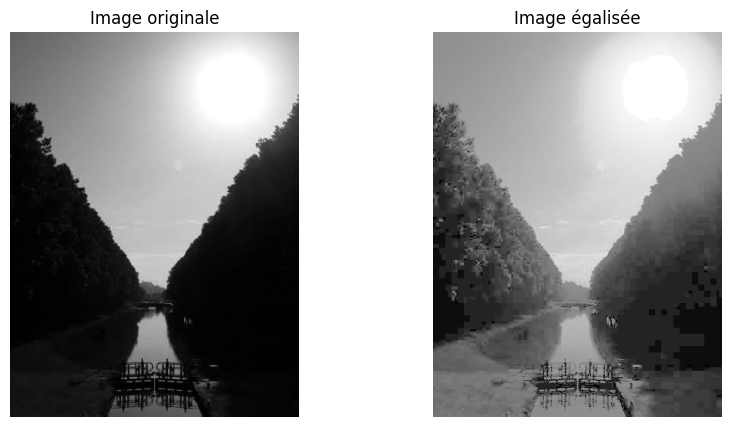

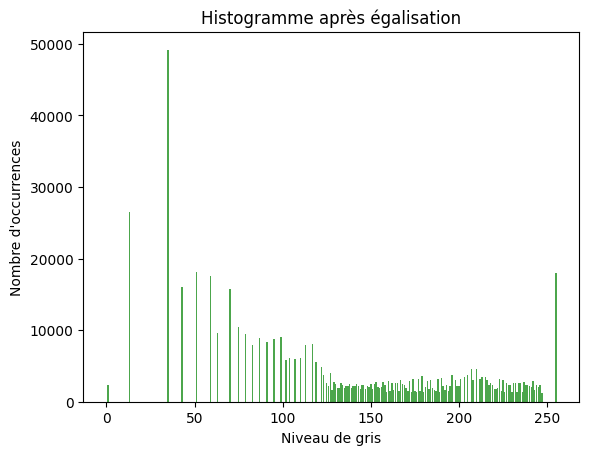

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

image_gris = Image.open(r"C:\Users\DELL\Desktop\img2.jpg")

plt.imshow(image_gris, cmap='gray')
plt.title("Image originale")
plt.axis("off")  
plt.show()

image_array = np.array(image_gris)

print("matrice de Img :")
print(image_array)


pixels_aplatis = image_array.flatten()
print("1D image table :")
print(pixels_aplatis)


occurences_pixels = np.zeros(256, dtype=int)

for pixel in pixels_aplatis:
    occurences_pixels[pixel] += 1

print("Occurrences de chaque niveau de gris :")
print(occurences_pixels)


plt.figure()
plt.bar(range(256), occurences_pixels, alpha=0.7, color="blue")
plt.title("Histogramme de l'image originale")
plt.xlabel("Niveau de gris")
plt.ylabel("Nombre d'occurrences")
plt.show()


distribution_cumulee = np.cumsum(occurences_pixels)

print("Distribution cumulée des niveaux de gris :")
print(distribution_cumulee)


distribution_normalisee = (distribution_cumulee * 255) / distribution_cumulee[-1]

print("Distribution normalisée des niveaux de gris :")
print(distribution_normalisee)


pixels_egalises = np.round(distribution_normalisee).astype(int)

image_egalisee_array = pixels_egalises[pixels_aplatis].reshape(image_array.shape)


image_egalisee = Image.fromarray(image_egalisee_array.astype(np.uint8))

plt.figure(figsize=(10, 5))


plt.subplot(1, 2, 1)
plt.imshow(image_gris, cmap='gray')
plt.title("Image originale")
plt.axis("off")


plt.subplot(1, 2, 2)
plt.imshow(image_egalisee, cmap='gray')
plt.title("Image égalisée")
plt.axis("off")

plt.show()



histogramme_egalise, _ = np.histogram(image_egalisee_array, bins=256, range=(0, 256))


plt.figure()
plt.bar(range(256), histogramme_egalise, alpha=0.7, color="green")
plt.title("Histogramme après égalisation")
plt.xlabel("Niveau de gris")
plt.ylabel("Nombre d'occurrences")
plt.show()


### TP03 : Entropie de l'image
On a amélioré le contraste d'une image en utilisant l'entropie comme critère. L'entropie est d'abord calculée à partir de la distribution des niveaux de gris de l'image, ce qui donne une mesure de la diversité des pixels. Ensuite, cette entropie est normalisée et utilisée pour ajuster un facteur qui modifie le contraste de l'image en fonction de sa valeur d'entropie. L'image est réajustée autour de sa moyenne, puis réétalonnée pour maximiser le contraste. Enfin, l'image originale et l'image améliorée sont affichées côte à côte pour comparaison.

Entropie calculée : 7.972227853752688


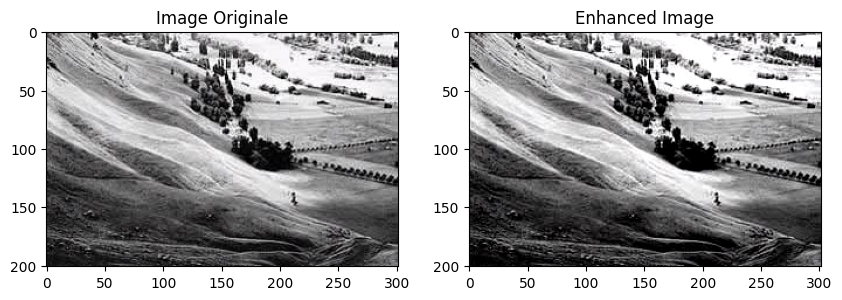

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def calculate_entropy(image_array):
    total_pixels = image_array.size
    unique_values, counts = np.unique(image_array, return_counts=True)
    probabilities = counts / total_pixels
    entropy = -np.sum(probabilities * np.log2(probabilities + 1e-10))  
    return entropy

def enhance_contrast_entropy_based(image_array):
    image_array = image_array.astype(np.float64)
    entropy_value = calculate_entropy(image_array)  
    
    print(f"Entropie calculée : {entropy_value}")  

    normalized_entropy = (entropy_value - 4) / 4  
    normalized_entropy = np.clip(normalized_entropy, 0, 1)

    factor = 1 + 2 * np.exp(-5 * (normalized_entropy - 0.5))
    
    enhanced_image_array = np.clip((image_array - image_array.mean()) * factor + 128, 0, 255)

    enhanced_image_array = (enhanced_image_array - enhanced_image_array.min()) / \
                           (enhanced_image_array.max() - enhanced_image_array.min()) * 255
    
    return enhanced_image_array.astype(np.uint8)

image_path = r"C:\Users\DELL\Desktop\img.jpg"
image = Image.open(image_path)
image_array = np.array(image)

enhanced_image_array = enhance_contrast_entropy_based(image_array)
enhanced_image = Image.fromarray(enhanced_image_array)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Image Originale")

plt.subplot(1, 2, 2)
plt.imshow(enhanced_image, cmap='gray')
plt.title("Enhanced Image")

plt.show()
